In [26]:
import mne
import matplotlib as plt
import numpy as np
import pandas as pd

In [27]:
epo = mne.read_epochs("../../data/S1.fif")

Reading ../../data/S1.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
1200 matching events found
No baseline correction applied
0 projection items activated
<ipython-input-27-6edf9a6103df>:1: RuntimeWarning: This filename (../../data/S1.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epo = mne.read_epochs("../../data/S1.fif")


    Using multitaper spectrum estimation with 7 DPSS windows
<ipython-input-28-589ee4319b74>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  _=epo.plot_psd()


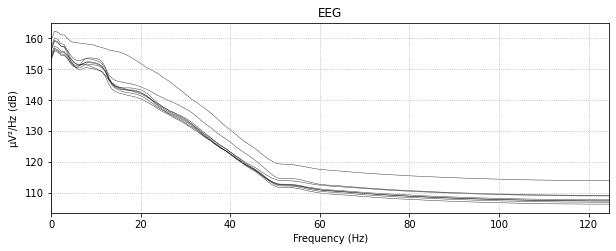

In [28]:
_=epo.plot_psd()

<ipython-input-52-3e6151290854>:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  _=mne.viz.plot_compare_evokeds(dict({'Target':epo['target'].average(), 'Non-target':epo['no-target'].average()}), picks=['C3'])


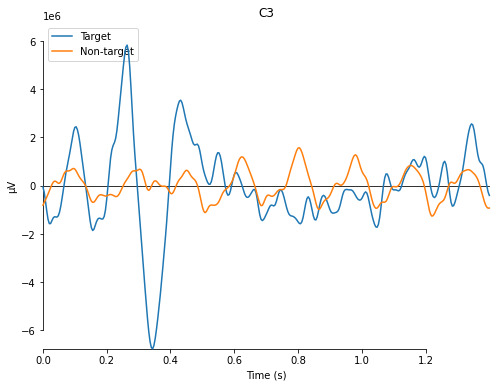

In [52]:
_=mne.viz.plot_compare_evokeds(dict({'Target':epo['target'].average(), 'Non-target':epo['no-target'].average()}), picks=['C3'])
ch_names = epo.info['ch_names']

# MNE Raw files

In [106]:
raw = mne.io.read_raw("../../data/R_S1.fif", preload=True)

Opening raw data file ../../data/R_S1.fif...
    Range : 0 ... 60870 =      0.000 ...   243.480 secs
Ready.
Reading 0 ... 60870  =      0.000 ...   243.480 secs...
<ipython-input-106-c79686ab00f8>:1: RuntimeWarning: This filename (../../data/R_S1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw("../../data/R_S1.fif", preload=True)


Effective window size : 8.192 (s)


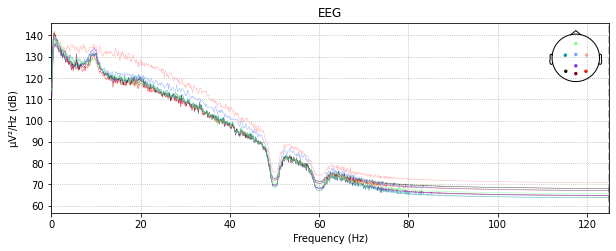

In [107]:
_=raw.plot_psd()

Effective window size : 8.192 (s)


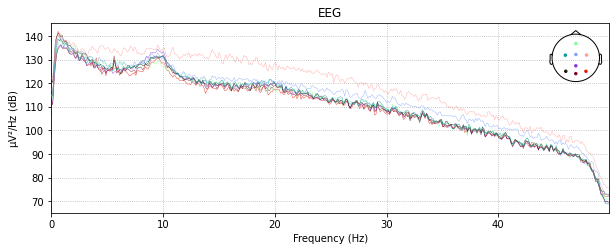

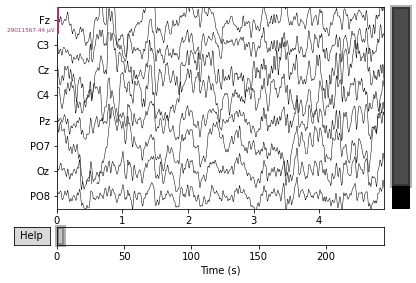

In [108]:
_=raw.plot_psd(fmax=50)
_=raw.plot(duration=5, n_channels=8, scalings="auto")

## Preprocessing

In [109]:
raw = raw.filter(0.1, 50., fir_design="firwin")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 8251 samples (33.004 sec)



Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 0.1s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
121 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
121 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


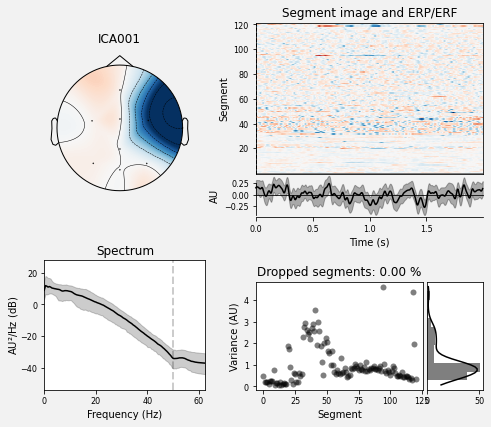

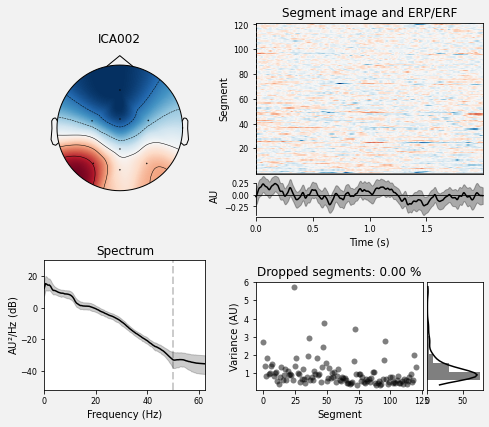

In [110]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=0.8, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
_=ica.plot_properties(raw, picks=ica.exclude)

In [111]:
ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroing out 2 ICA components
    Projecting back using 8 PCA components


<Raw | R_S1.fif, 9 x 60871 (243.5 s), ~4.2 MB, data loaded>

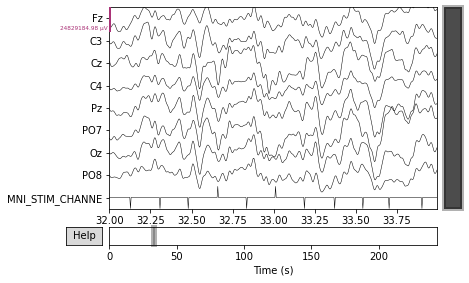

In [112]:
_=raw.plot(start=32, duration=2, scalings="auto")

In [113]:
events = mne.find_events(raw)
print(events[:5])

1200 events found
Event IDs: [1]
[[1254    0    1]
 [1299    0    1]
 [1342    0    1]
 [1383    0    1]
 [1430    0    1]]
<ipython-input-113-76f66fb73a08>:1: RuntimeWarning: Trigger channel contains negative values, using absolute value. If data were acquired on a Neuromag system with STI016 active, consider using uint_cast=True to work around an acquisition bug
  events = mne.find_events(raw)
